# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Imperial"

#Build query url
query_url = url + "units=" + unit + "&APPID=" + weather_api_key + "&q="

In [6]:
#Rdcord number & Set number
set_num = 1
rec_num = 1

#Lists
city_name = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind_spd = []
country = []
date = []

print("Beginning Data Retrieval")
print("-----------------------------")

for i, city in enumerate(cities):
    #limit to 50 and restart the record number
    if (i%50 == 0 and i>=50):
        set_num += 1
        rec_num = 1
        #10sec. break
        time.sleep(0.5)
    try:
        #response from each city
        response = requests.get(query_url + city).json()
        #append lists above
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        print("Processing Record " + str(rec_num) + " of Set " + str(set_num) + " | " + city)
        rec_num = rec_num + 1
    except (KeyError):
        print("City not found. Skipping...")
                
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | punta arenas
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | biu
Processing Record 8 of Set 1 | hualmay
City not found. Skipping...
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | aguilas
Processing Record 11 of Set 1 | dikson
City not found. Skipping...
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | visnes
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | ekibastuz
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | ahipara
Pro

Processing Record 4 of Set 5 | necochea
Processing Record 5 of Set 5 | zhangye
Processing Record 6 of Set 5 | komsomolskiy
Processing Record 7 of Set 5 | khatanga
Processing Record 8 of Set 5 | cockburn town
Processing Record 9 of Set 5 | kungurtug
Processing Record 10 of Set 5 | itacare
Processing Record 11 of Set 5 | severo-kurilsk
Processing Record 12 of Set 5 | tura
Processing Record 13 of Set 5 | zalantun
Processing Record 14 of Set 5 | kavieng
Processing Record 15 of Set 5 | san jose
Processing Record 16 of Set 5 | merrill
Processing Record 17 of Set 5 | waling
Processing Record 18 of Set 5 | monrovia
Processing Record 19 of Set 5 | akyab
Processing Record 20 of Set 5 | passo de camaragibe
City not found. Skipping...
Processing Record 21 of Set 5 | mangualde
Processing Record 22 of Set 5 | luanda
Processing Record 23 of Set 5 | kruisfontein
Processing Record 24 of Set 5 | pilar
Processing Record 25 of Set 5 | lakes entrance
City not found. Skipping...
Processing Record 26 of Set 

Processing Record 10 of Set 9 | nangong
Processing Record 11 of Set 9 | peravurani
Processing Record 12 of Set 9 | rodbyhavn
Processing Record 13 of Set 9 | walvis bay
Processing Record 14 of Set 9 | talnakh
Processing Record 15 of Set 9 | dalvik
Processing Record 16 of Set 9 | chernyshevskiy
Processing Record 17 of Set 9 | karpogory
Processing Record 18 of Set 9 | wloclawek
Processing Record 19 of Set 9 | vila franca do campo
Processing Record 20 of Set 9 | victoria
Processing Record 21 of Set 9 | leshukonskoye
Processing Record 22 of Set 9 | nokaneng
Processing Record 23 of Set 9 | leh
Processing Record 24 of Set 9 | hillsboro
Processing Record 25 of Set 9 | tiebissou
Processing Record 26 of Set 9 | amot
Processing Record 27 of Set 9 | stawell
Processing Record 28 of Set 9 | port hedland
Processing Record 29 of Set 9 | asau
Processing Record 30 of Set 9 | portland
Processing Record 31 of Set 9 | stokmarknes
Processing Record 32 of Set 9 | solnechnyy
Processing Record 33 of Set 9 | av

Processing Record 11 of Set 13 | akureyri
Processing Record 12 of Set 13 | berbera
Processing Record 13 of Set 13 | tadine
Processing Record 14 of Set 13 | costinesti
Processing Record 15 of Set 13 | henties bay
Processing Record 16 of Set 13 | galveston
Processing Record 17 of Set 13 | saint george
Processing Record 18 of Set 13 | oshakati
Processing Record 19 of Set 13 | enterprise
Processing Record 20 of Set 13 | stephenville
Processing Record 21 of Set 13 | forte dei marmi
Processing Record 22 of Set 13 | novotroitskaya
Processing Record 23 of Set 13 | isa khel
-----------------------------
Data Retrieval Complete
-----------------------------


In [13]:
#Example

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
#DataFrame
city_data_df = pd.DataFrame({'City': city_name,
                             'Lat': lat,
                             'Lng': lng,
                             'Max Temp': max_temp,
                             'Humidity': hum,
                             'Cloudiness': cloud,
                             'Wind Speed': wind_spd,
                             'Country': country,
                             'Date': date})

In [36]:
#Format
city_data_df['Lat'] = city_data_df['Lat'].map('{:,.2f}'.format)
city_data_df['Lng'] = city_data_df['Lng'].map('{:,.2f}'.format)

#Show DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.45,-133.04,53.60,87,75,4.61,CA,1661644020
1,cidreira,-30.18,-50.21,64.54,82,0,1.59,BR,1661643821
2,punta arenas,-53.15,-70.92,41.11,75,40,24.16,CL,1661643862
3,yellowknife,62.46,-114.35,68.52,42,75,3.44,CA,1661643946
4,busselton,-33.65,115.33,50.97,71,81,9.78,AU,1661644021


In [15]:
#Example

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [9]:
city_data_df['Lat'] = city_data_df['Lat'].astype('float', errors='ignore')

In [10]:
city_data_df['Lng'] = city_data_df['Lng'].astype('float', errors='ignore')

In [11]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,21.129225,19.476637,67.560475,72.434859,52.727113,7.919419,1.661644e+09
std,33.094597,89.174445,13.833973,19.023868,38.144132,5.609750,8.299966e+01
min,-54.800000,-175.200000,32.320000,9.000000,0.000000,0.000000,1.661644e+09
25%,-6.162500,-58.840000,58.012500,64.000000,14.000000,3.732500,1.661644e+09
50%,26.255000,20.895000,69.305000,76.000000,57.500000,6.590000,1.661644e+09
75%,48.612500,97.242500,78.127500,86.250000,93.000000,10.612500,1.661644e+09
max,78.220000,179.320000,104.540000,100.000000,100.000000,31.070000,1.661644e+09


In [16]:
#Example

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [12]:
#Export to CSV
city_data_df.to_csv("../output_data/city_data.csv")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.45,-133.04,53.60,87,75,4.61,CA,1661644020
1,cidreira,-30.18,-50.21,64.54,82,0,1.59,BR,1661643821
2,punta arenas,-53.15,-70.92,41.11,75,40,24.16,CL,1661643862
3,yellowknife,62.46,-114.35,68.52,42,75,3.44,CA,1661643946
4,busselton,-33.65,115.33,50.97,71,81,9.78,AU,1661644021
...,...,...,...,...,...,...,...,...,...
563,enterprise,36.03,-115.24,104.54,12,20,12.66,US,1661644232
564,stephenville,32.22,-98.20,95.16,35,0,8.99,US,1661644233
565,forte dei marmi,43.96,10.17,74.19,88,60,5.79,IT,1661644233
566,novotroitskaya,45.33,41.53,68.65,62,2,8.86,RU,1661644234


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

# Skipped because there was no humidity value over 100%

In [6]:
#Example

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

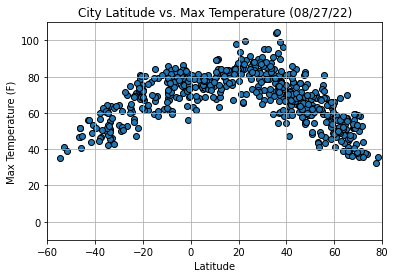

In [14]:
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x, y, edgecolors='black')
plt.title('City Latitude vs. Max Temperature (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-60, 80])
plt.ylabel('Max Temperature (F)')
plt.ylim([-10,110])
plt.grid(visible=bool)
plt.show()

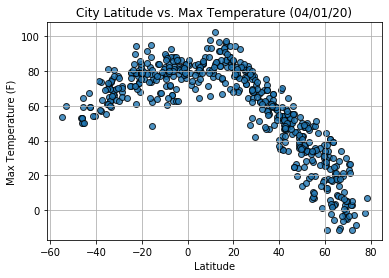

In [10]:
#Example

## Latitude vs. Humidity Plot

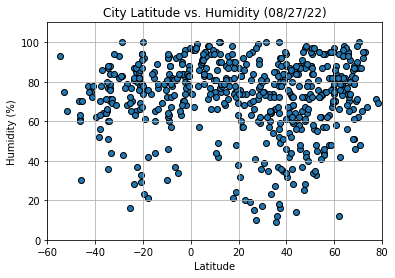

In [15]:
x = city_data_df['Lat']
y = city_data_df['Humidity']

plt.scatter(x, y, edgecolors='black')
plt.title('City Latitude vs. Humidity (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-60, 80])
plt.ylabel('Humidity (%)')
plt.ylim([0, 110])
plt.grid(visible=bool)
plt.show()

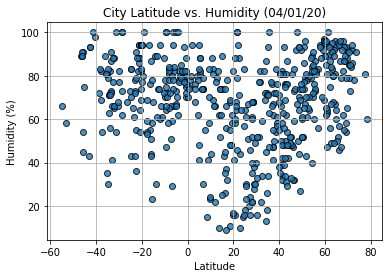

In [11]:
#Example

## Latitude vs. Cloudiness Plot

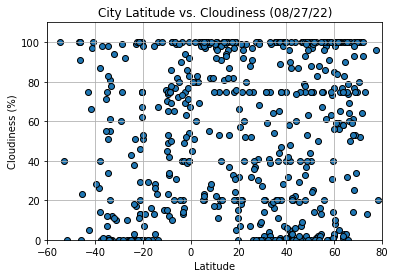

In [16]:
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

plt.scatter(x, y, edgecolors='black')
plt.title('City Latitude vs. Cloudiness (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-60, 80])
plt.ylabel('Cloudiness (%)')
plt.ylim([0, 110])
plt.grid(visible=bool)
plt.show()

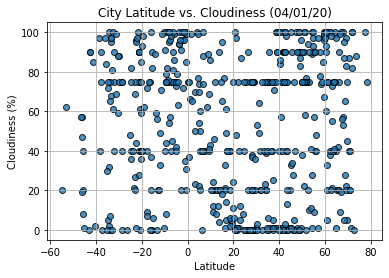

In [12]:
#Example

## Latitude vs. Wind Speed Plot

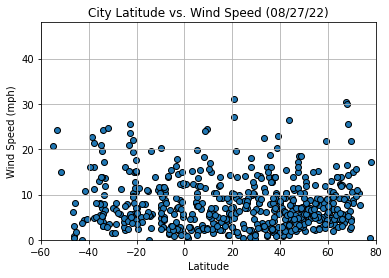

In [17]:
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

plt.scatter(x, y, edgecolors='black')
plt.title('City Latitude vs. Wind Speed (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-60, 80])
plt.ylabel('Wind Speed (mph)')
plt.ylim([0, 48])
plt.grid(visible=bool)
plt.show()

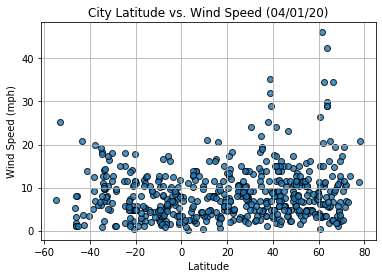

In [13]:
#Example

## Linear Regression

In [18]:
#Northern Hemispehre / Southern Hemisphere
norhem_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]
souhem_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
#Set x/y values
x = norhem_df['Lat']
y = norhem_df['Max Temp']

#Prep for linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

The r-value is: -0.7277803384071665


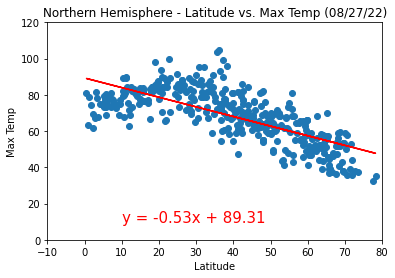

In [20]:
#Linear regression info
regress_values = x * slope + intercept

#Scatter plot
plt.scatter(x, y)
plt.title('Northern Hemisphere - Latitude vs. Max Temp (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-10, 80])
plt.ylabel('Max Temp')
plt.ylim([0, 120])
#Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.plot(x, regress_values, color='red')
plt.annotate(line_eq, (10, 10), fontsize=15, color='red')
print('The r-value is: '+ str(rvalue))
plt.show()

The r-value is: 0.46937863826630627


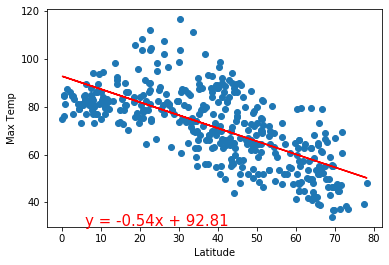

In [25]:
#Example

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
#Set x/y values
x = souhem_df['Lat']
y = souhem_df['Max Temp']

#Prep for linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

The r-value is: 0.7897806577964781


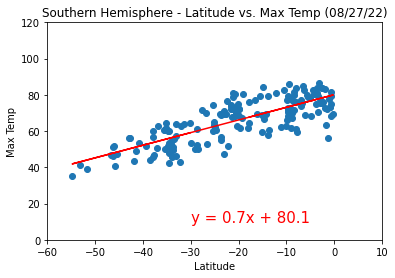

In [22]:
#Linear regression info
regress_values = x * slope + intercept

#Scatter plot
plt.scatter(x, y)
plt.title('Southern Hemisphere - Latitude vs. Max Temp (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-60, 10])
plt.ylabel('Max Temp')
plt.ylim([0, 120])
#Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.plot(x, regress_values, color='red')
plt.annotate(line_eq, (-30, 10), fontsize=15, color='red')
print('The r-value is: '+ str(rvalue))
plt.show()

The r-value is: 0.6082708688906918


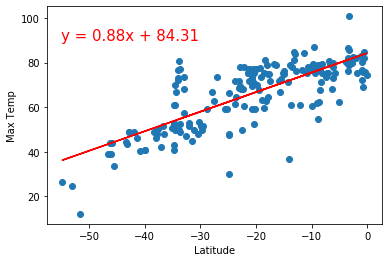

In [26]:
#Example

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
#Set x/y values
x = norhem_df['Lat']
y = norhem_df['Humidity']

#Prep for linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

The r-value is: -0.04794445350302166


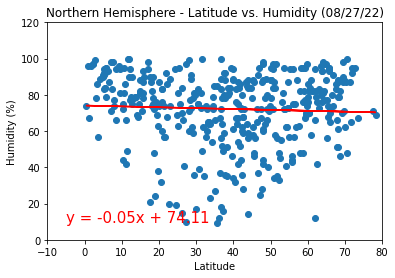

In [24]:
#Linear regression info
regress_values = x * slope + intercept

#Scatter plot
plt.scatter(x, y)
plt.title('Northern Hemisphere - Latitude vs. Humidity (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-10, 80])
plt.ylabel('Humidity (%)')
plt.ylim([0, 120])
#Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.plot(x, regress_values, color='red')
plt.annotate(line_eq, (-5, 10), fontsize=15, color='red')
print('The r-value is: '+ str(rvalue))
plt.show()

The r-value is: 0.000543987878808455


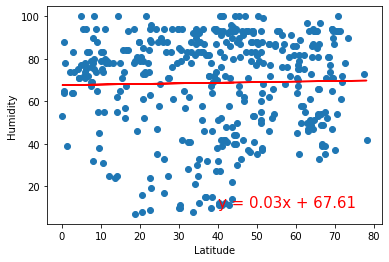

In [27]:
#Example

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
#Set x/y values
x = souhem_df['Lat']
y = souhem_df['Humidity']

#Prep for linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

The r-value is: 0.17702605804728017


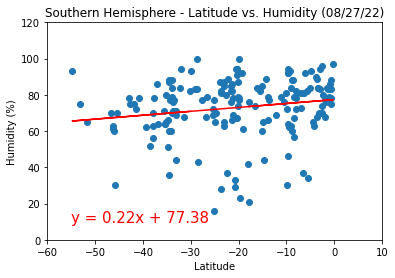

In [26]:
#Linear regression info
regress_values = x * slope + intercept

#Scatter plot
plt.scatter(x, y)
plt.title('Southern Hemisphere - Latitude vs. Humidity (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-60, 10])
plt.ylabel('Humidity (%)')
plt.ylim([0, 120])
#Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.plot(x, regress_values, color='red')
plt.annotate(line_eq, (-55, 10), fontsize=15, color='red')
print('The r-value is: '+ str(rvalue))
plt.show()

The r-value is: 0.014985174297345524


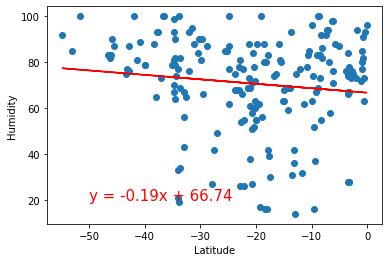

In [28]:
#Example

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
#Set x/y values
x = norhem_df['Lat']
y = norhem_df['Cloudiness']

#Prep for linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

The r-value is: -0.020249580414515626


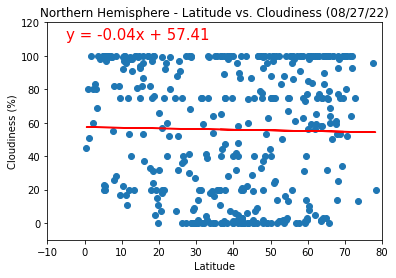

In [28]:
#Linear regression info
regress_values = x * slope + intercept

#Scatter plot
plt.scatter(x, y)
plt.title('Northern Hemisphere - Latitude vs. Cloudiness (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-10, 80])
plt.ylabel('Cloudiness (%)')
plt.ylim([-10, 120])
#Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.plot(x, regress_values, color='red')
plt.annotate(line_eq, (-5, 110), fontsize=15, color='red')
print('The r-value is: '+ str(rvalue))
plt.show()

The r-value is: 0.0020898727664228514


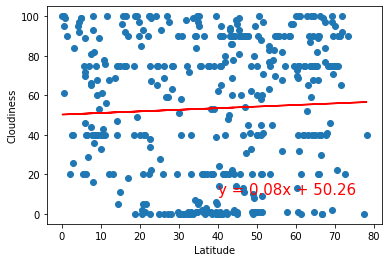

In [29]:
#Example

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
#Set x/y values
x = souhem_df['Lat']
y = souhem_df['Cloudiness']

#Prep for linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

The r-value is: 0.15899828680073289


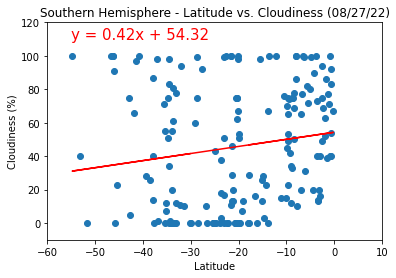

In [30]:
#Linear regression info
regress_values = x * slope + intercept

#Scatter plot
plt.scatter(x, y)
plt.title('Southern Hemisphere - Latitude vs. Cloudiness (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-60, 10])
plt.ylabel('Cloudiness (%)')
plt.ylim([-10, 120])
#Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.plot(x, regress_values, color='red')
plt.annotate(line_eq, (-55, 110), fontsize=15, color='red')
print('The r-value is: '+ str(rvalue))
plt.show()

The r-value is: 0.0035263772085582894


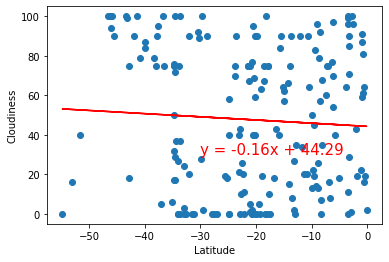

In [30]:
#Example

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [31]:
#Set x/y values
x = norhem_df['Lat']
y = norhem_df['Wind Speed']

#Prep for linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

The r-value is: 0.04884382472112967


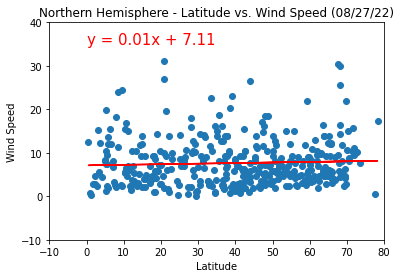

In [32]:
#Linear regression info
regress_values = x * slope + intercept

#Scatter plot
plt.scatter(x, y)
plt.title('Northern Hemisphere - Latitude vs. Wind Speed (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-10, 80])
plt.ylabel('Wind Speed')
plt.ylim([-10, 40])
#Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.plot(x, regress_values, color='red')
plt.annotate(line_eq, (0, 35), fontsize=15, color='red')
print('The r-value is: '+ str(rvalue))
plt.show()

The r-value is: 0.04019723576144484


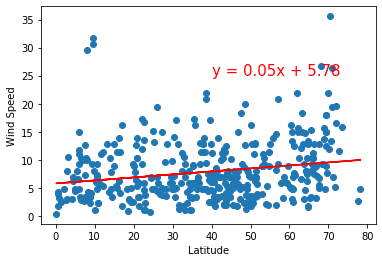

In [31]:
#Example

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
#Set x/y values
x = souhem_df['Lat']
y = souhem_df['Wind Speed']

#Prep for linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

The r-value is: -0.16009046966285062


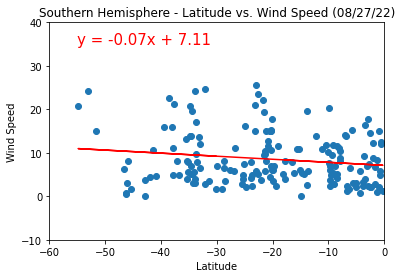

In [34]:
#Linear regression info
regress_values = x * slope + intercept

#Scatter plot
plt.scatter(x, y)
plt.title('Southern Hemisphere - Latitude vs. Wind Speed (08/27/22)')
plt.xlabel('Latitude')
plt.xlim([-60, 0])
plt.ylabel('Wind Speed')
plt.ylim([-10, 40])
#Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.plot(x, regress_values, color='red')
plt.annotate(line_eq, (-55, 35), fontsize=15, color='red')
print('The r-value is: '+ str(rvalue))
plt.show()

The r-value is: 0.017128274759839232


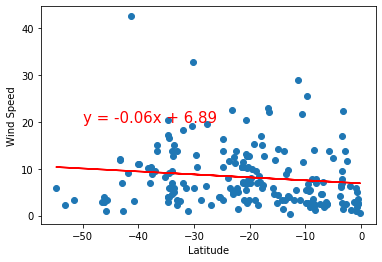

In [32]:
#Example

# Analysis

Based on scatter plots & r-values, below are my observations on Aug. 27th, 2022:

1) Cities in Northern Hemisphere show negative correlation between Latitude & Max Temperature, but cities in Southern Hemisphere show positive correlation between Latitude & Max Temperature. The r-value for Northern Hemisphere data was -0.73, and the r-value for Southern Hemisphere data was 0.79.

2) In both Northern Hemisphere and Southern Hemisphere, there was close to no correlation between Latitude & Humidity. Their r-values were -0.05 and 0.18. Their r-values were very close to 0.

3) In both Northern Hemisphere and Southern Hemisphere, there was close to no correlation between Latitude & Cloudiness. Their r-values were -0.02 and 0.16.